<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="B Yas" color="gray">
سوال 1    
</font>
</h1>

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         ابتدا در سلول زیر کتابخانه های مورد نظر را اضافه می کنیم.
    </font>
</div>

In [ ]:
import numpy as np
import control
import matplotlib.pyplot as plt
from scipy.signal import *
from scipy.fft import *
%matplotlib inline
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

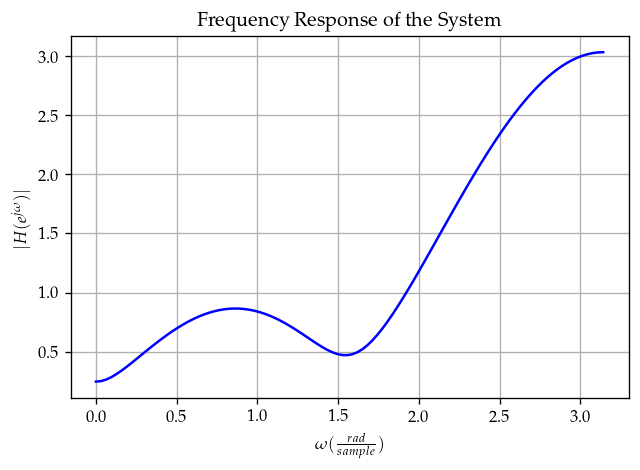

In [13]:
#find the frequency response of the system
w, h = freqz([1, -0.85, 0.64, -0.544], [1, 0, 0, 0], worN=np.linspace(0, np.pi, 100))
#draw the frequency response
plt.figure(dpi=120)
plt.plot(w, abs(h), 'b')
plt.grid(True)
plt.title("Frequency Response of the System")
plt.ylabel("$|H(e^{j\omega})|$")
plt.xlabel("$\omega (\\frac{rad}{sample})$")
plt.savefig("Q1_part1.png")

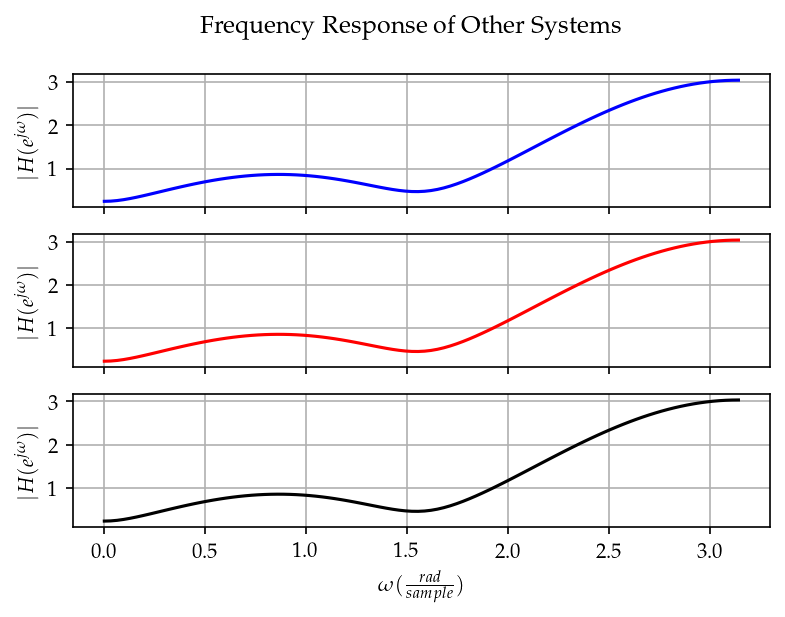

In [26]:
w1, h1 = freqz([1, -1.176, 0.64, -0.753], [1.176, 0, 0, 0], worN=np.linspace(0, np.pi, 100))
w2, h2 = freqz([1, -0.85, 1.5625, -1.328], [1.5625, 0, 0, 0], worN=np.linspace(0, np.pi, 100))
w3, h3 = freqz([1, -1.176, 1.5625, -1.8375], [1.8375, 0, 0, 0], worN=np.linspace(0, np.pi, 100))
fig, axs = plt.subplots(3, 1, dpi=150)
plt.suptitle("Frequency Response of Other Systems")

axs[0].plot(w1, abs(h1), 'b')
axs[1].plot(w2, abs(h2), 'r')
axs[2].plot(w3, abs(h3), 'k')
for ax in axs.flat:
    ax.set_ylabel("$|H(e^{j\\omega})|$")
    ax.set_xlabel("$\\omega(\\frac{rad}{sample})$")
    ax.label_outer()
    ax.grid(True)

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         مقادیر فاز ها در شکل زیر نمایش داده شده اند و همانطور که مشخص است مقدار فاز سیستم مینیمم فاز از همه کمتر می باشد.
    </font>
</div>

Text(0.5, 0.01, '$\\omega(\\frac{rad}{sample})$')

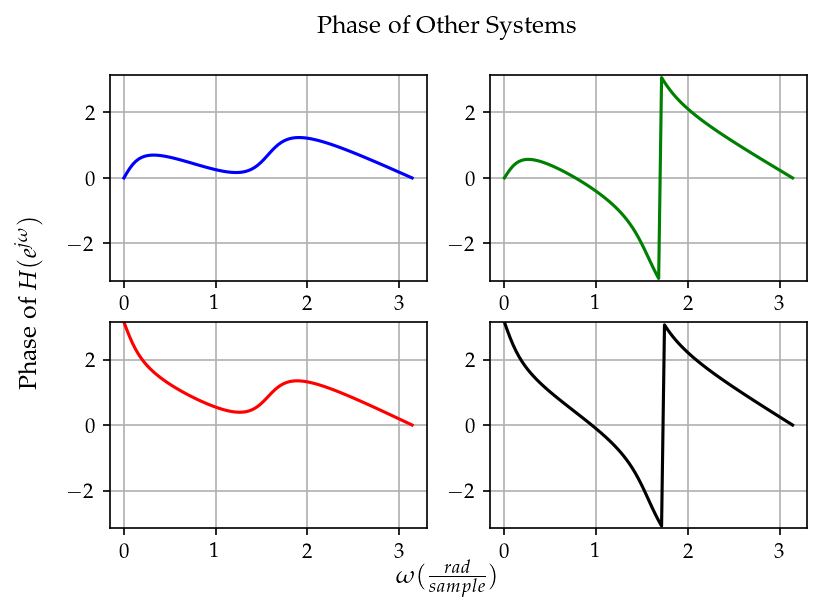

In [40]:
fig, axs = plt.subplots(2, 2, dpi=150)
plt.suptitle("Phase of Other Systems")

axs[0, 0].plot(w, np.angle(h), 'b')
axs[1, 0].plot(w1, np.angle(h1), 'r')
axs[0, 1].plot(w2, np.angle(h2), 'g')
axs[1, 1,].plot(w3, np.angle(h3), 'k')
for ax in axs.flat:
    ax.set_ylim(-np.pi, np.pi)
    ax.grid(True)
    
fig.supylabel("Phase of $H(e^{j\\omega})$")
fig.supxlabel("$\\omega(\\frac{rad}{sample})$")

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="B Yas" color="gray">
سوال 2    
</font>
</h1>

(array([], dtype=float64), array([], dtype=float64))

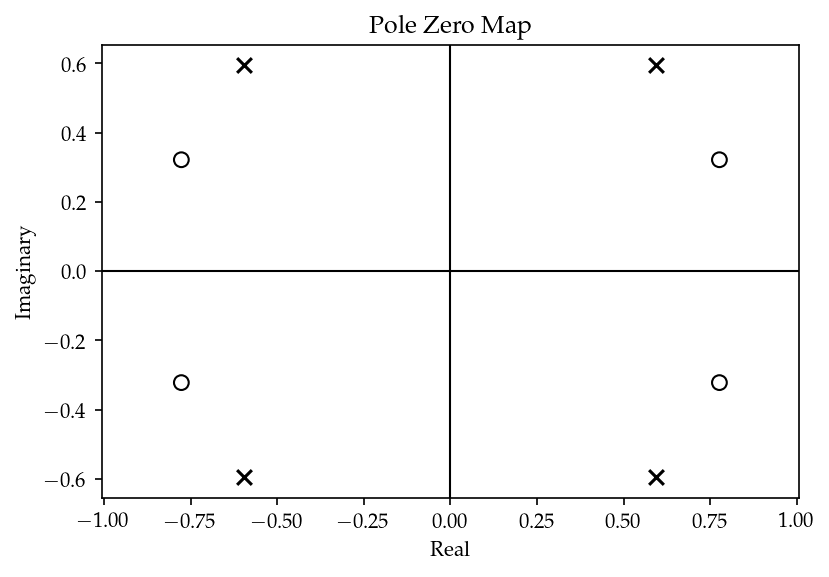

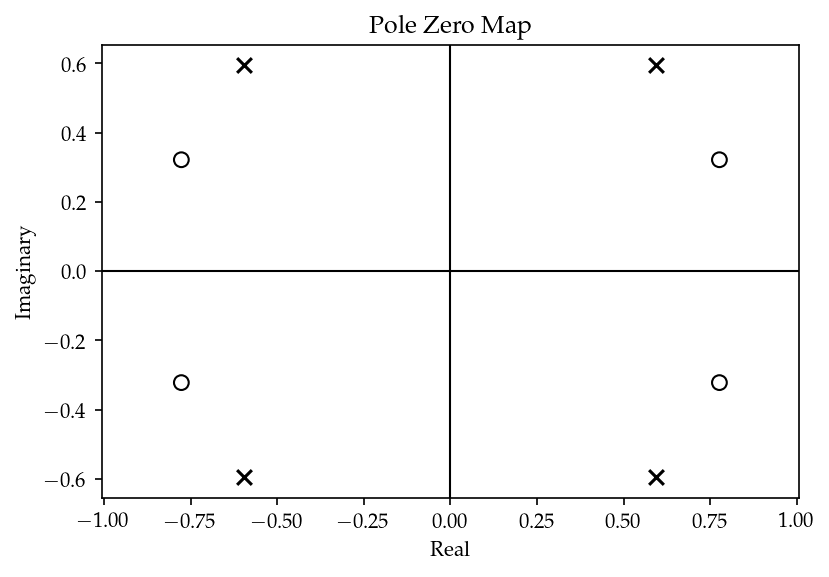

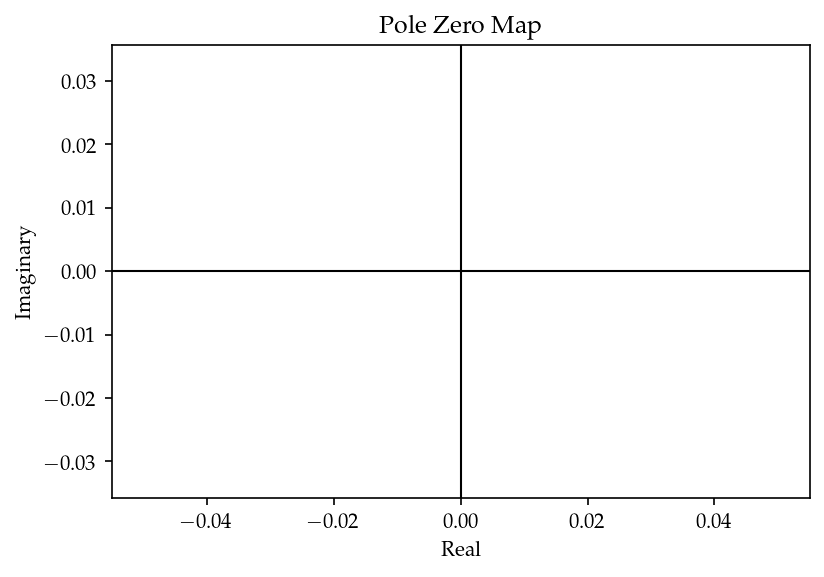

In [6]:
def AP_MP(num, den):
    AP_num = []
    AP_den = []
    MP_num = []
    MP_den = []
    coeff = 1
    zeros = np.roots(num)
    poles = np.roots(den)
    for zero in zeros:
        if abs(zero) < 1:
            MP_num.append(zero)
        else:
            AP_num.append(zero)
            AP_den.append(1/np.conj(zero))
            MP_num.append(1/np.conj(zero))
            coeff = coeff * (1/np.conj(zero))
    
    for pole in poles:
        if abs(pole) < 1:
            MP_den.append(pole)
        else:
            AP_den.append(pole)
            AP_num.append(1/np.conj(pole))
            MP_den.append(1/np.conj(pole))
            coeff = coeff * np.conj(pole)
    
    import numpy.polynomial.polynomial as poly
    MP_num = np.flip(poly.polyfromroots(MP_num)) * (1/coeff)
    MP_den = np.flip(poly.polyfromroots(MP_den))
    AP_num = np.flip(poly.polyfromroots(AP_num)) * coeff
    AP_den = np.flip(poly.polyfromroots(AP_den))
    
    
    return (MP_num, MP_den, AP_num, AP_den)

num = [1, 0, -1, 0, 0.5]
den = [1, 0, 0, 0, 0.5]
MP_num, MP_den, AP_num, AP_den = AP_MP(num, den)
plt.figure(dpi=150)
control.pzmap(control.TransferFunction(num, den), plot=True)
plt.figure(dpi=150)
control.pzmap(control.TransferFunction(MP_num, MP_den), plot=True)
plt.figure(dpi=150)
control.pzmap(control.TransferFunction(AP_num, AP_den), plot=True)

[1.]
[1.]


E:\University\DSP\CHW\dsp-venv\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, '$\\omega (\\frac{rad}{sample})$')

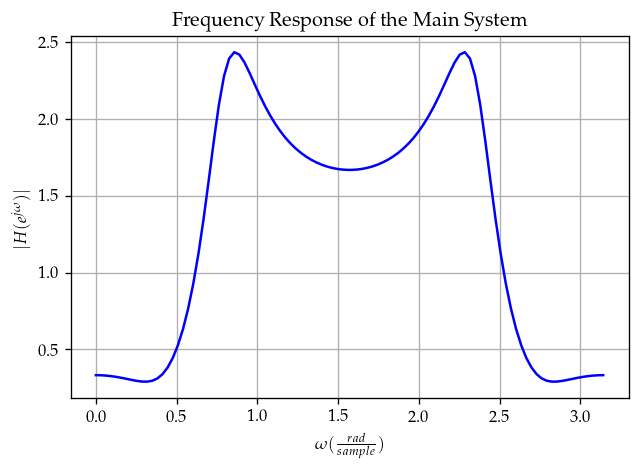

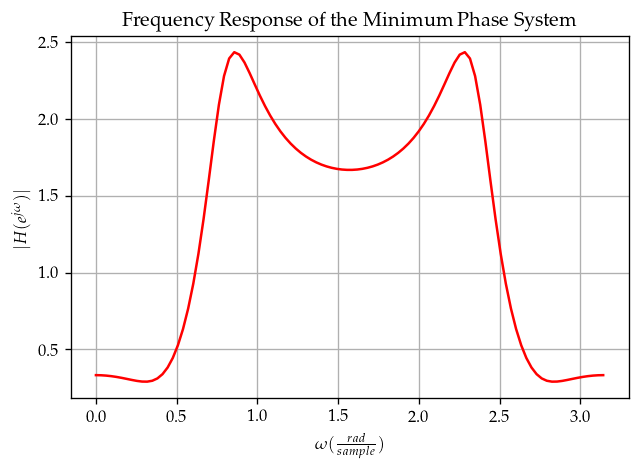

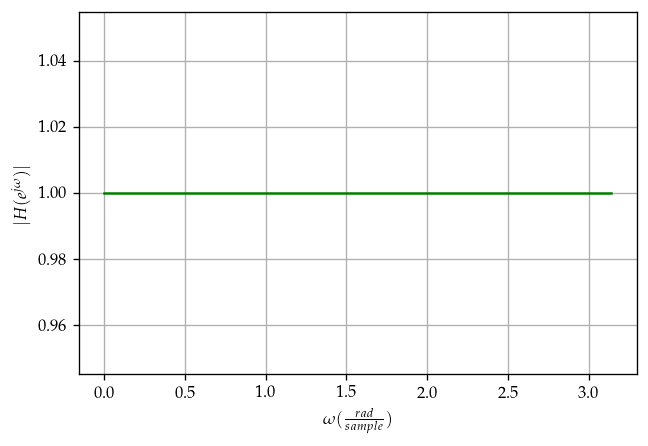

In [7]:
num = [1, 0, -1, 0, 0.5]
den = [1, 0, 0, 0, 0.5]
MP_num, MP_den, AP_num, AP_den = AP_MP(num, den)

w, h = freqz(num, den, worN=np.linspace(0, np.pi, 100))
plt.figure(dpi=120)
plt.plot(w, abs(h), 'b')
plt.grid(True)
plt.title("Frequency Response of the Main System")
plt.ylabel("$|H(e^{j\omega})|$")
plt.xlabel("$\omega (\\frac{rad}{sample})$")

w_MP, h_MP = freqz(MP_num, MP_den, worN=np.linspace(0, np.pi, 100))
plt.figure(dpi=120)
plt.plot(w_MP, abs(h_MP), 'r')
plt.grid(True)
plt.title("Frequency Response of the Minimum Phase System")
plt.ylabel("$|H(e^{j\omega})|$")
plt.xlabel("$\omega (\\frac{rad}{sample})$")

w_AP, h_AP = freqz(AP_num, AP_den, worN=np.linspace(0, np.pi, 100))
plt.figure(dpi=120)
plt.plot(w_AP, h_AP, 'g')
plt.grid(True)
#plt.title("Frequency Response of the All Pass System")
plt.ylabel("$|H(e^{j\omega})|$")
plt.xlabel("$\omega (\\frac{rad}{sample})$")

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="B Yas" color="gray">
سوال 3    
</font>
</h1>

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         در سلول زیر نمودار صفر و قطب سیستم رسم شده است و همانطور که مشخص است تمامی صفرها و قطب ها داخل دایره واحد هستند و فیلتر مینیمم فاز می باشد و می تواند سببی نیز باشد.
    </font>
</div>

(array([0.2855+0.19872028j, 0.2855-0.19872028j]),
 array([0.78947368+0.10165894j, 0.78947368-0.10165894j]))

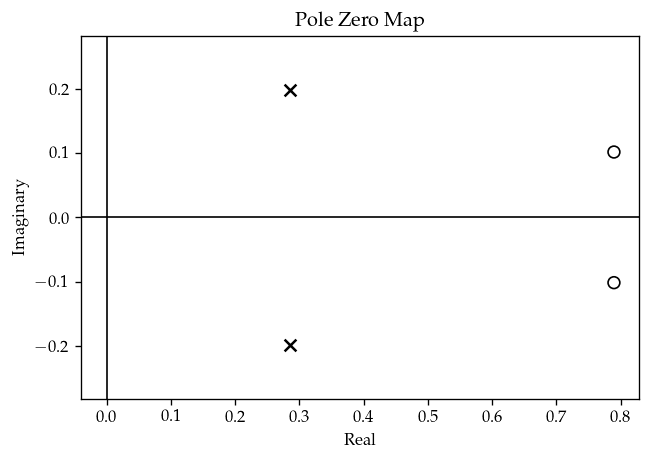

In [2]:
num = [9.88, -15.6, 6.26]
den = [1, -0.571, 0.121]
plt.figure(dpi=120)
control.pzmap(control.TransferFunction(num, den))

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         پاسخ ضربه سیستم در شکل زیر رسم شده است.
    </font>
</div>

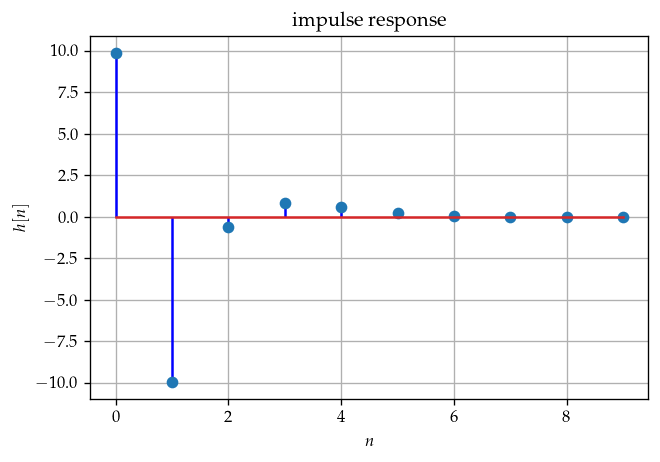

In [3]:
system = TransferFunction(num, den, dt=1)
t, y = dimpulse(system, n=10)
plt.figure(dpi=120)
plt.stem(t, np.squeeze(y), 'b')
plt.title('impulse response')
plt.xlabel('$n$')
plt.ylabel('$h[n]$')
plt.grid(True)

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         می توان این سیستم را به شکل real time تحقق داد که این تحقق به همراه پاسخ حاصل از کانولوشن در شکل زیر نشان داده شده اند.
    </font>
</div>

(-1.0, 10.0)

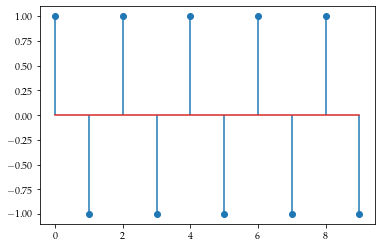

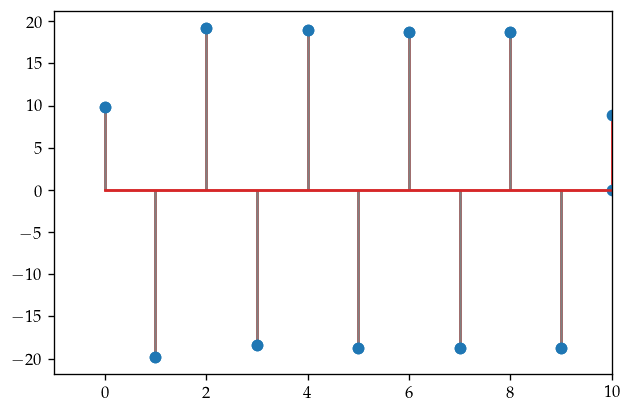

In [17]:
h = np.squeeze(y)
x = np.cos(np.pi * t)
plt.figure()
plt.stem(x)
y0 = convolve(h, x, method='direct')
plt.figure(dpi=120)
plt.stem(y0, linefmt='red')
y1 = np.zeros((38, 1))
y1[0] = 9.88
y1[1] = 0.571*y1[0] + 9.88*x[1] - 15.6*x[0]
for i in range(2, 10):
    y1[i] = 0.571*y1[i-1]-0.121*y1[i-2]+9.88*x[i]-15.6*x[i-1]+6.26*x[i-2]
plt.stem(y1, linefmt='gray')
plt.xlim(-1, 10)

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="B Yas" color="gray">
سوال 4    
</font>
</h1>

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         در سلول زیر تابع FIR_to_lattice نوشته شده است که با گرفتن آرایه ای از ضرایب فیلتر FIR در ورودی مقادیر متناسب lattice را بر می گرداند.
    </font>
</div>

In [22]:
def FIR_to_lattice(a):
    M = len(a)
    k = np.zeros((len(a), 1))
    k[M-1] = a[M-1]
    b = np.zeros((M, M))
    b[M-1] = a.copy()
    for i in range(2, M+1):
        n = M+1-i
        for j in range(n):
            b[n-1][j] = (b[n][j] + k[n]*b[n][n-1-j]) / (1-k[n]**2)
        k[n-1] = b[n-1][n-1]
    
    return k

FIR_to_lattice([0.9, -0.64, 0.576])

array([[ 0.67275748],
       [-0.18197491],
       [ 0.576     ]])

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         همانطور که در خروجی سلول بالا مشخص است ضرایب طراحی lattice فیلتر، $0.673$ و $-0.182$ و $0.576$ می باشند.
    </font>
</div>

In [29]:
def lattice_to_FIR(k):
    M = len(k)
    a = np.zeros((M, M))
    for i in range(M):
        a[i][i] = k[i]
        if i > 0:
            for j in range(i):
                a[i][j] = a[i-1][j] - k[i]*a[i-1][i-1-j]
    b = np.zeros((M, 1))
    for i in range(len(b)):
        b[i] = a[M-1][i]
    return b

lattice_to_FIR([0.673, -0.181, 0.576])

array([[ 0.899069  ],
       [-0.63881229],
       [ 0.576     ]])

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         همانطور که مشخص است ضرایب فیلتر معکوس نیز درست داده می شوند.
    </font>
</div>

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="B Yas" color="gray">
سوال 5    
</font>
</h1>

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         طراحی فیلتر با پنجره Hamming:
    </font>
</div>

<class 'numpy.ndarray'>


(0.0, 3.141592653589793)

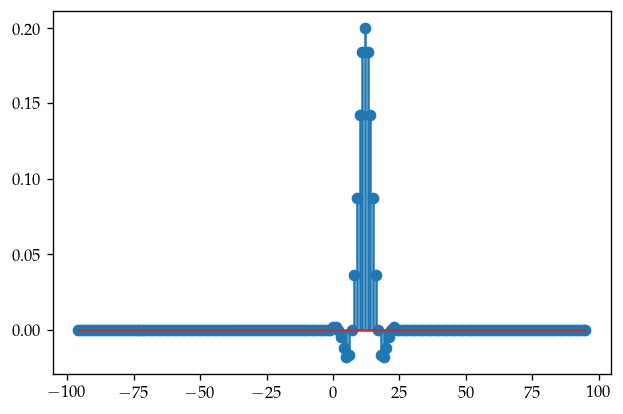

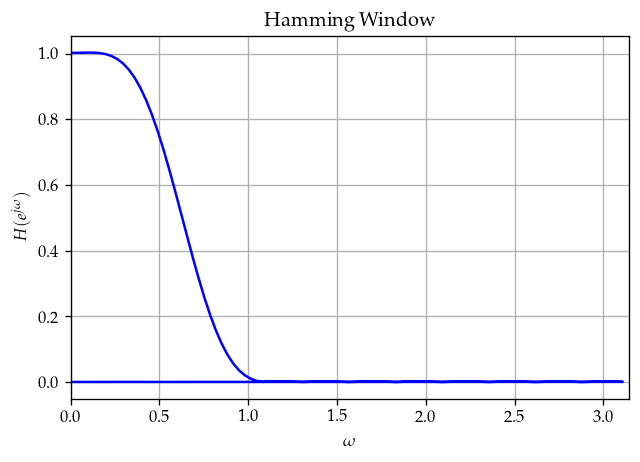

In [59]:
M = 24
omega_c = 0.2*np.pi
n = np.arange(-4*M, 4*M)
h_d = omega_c/np.pi*np.sinc(omega_c/np.pi*(n-M/2))

# Hamming
w_hamming = 0.54 - 0.46*np.cos(2*np.pi*n/M)
for i in range(len(w_hamming)):
    if n[i]>=M or n[i]<0:
        w_hamming[i] = 0
h_hamming = h_d * w_hamming
plt.figure(dpi=120)
plt.stem(n, h_hamming)

H_hamming = np.fft.fft(h_hamming)
freq = fftfreq(n.shape[-1])
plt.figure(dpi=120)
plt.plot(freq*2*np.pi, np.abs(H_hamming), 'b')
plt.title('Hamming Window')
plt.xlabel('$\\omega$')
plt.ylabel('$H(e^{j\\omega})$')
plt.grid(True)
plt.xlim(0, np.pi)

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         طراحی فیلتر با پنجره Blackman:
    </font>
</div>

(0.0, 3.141592653589793)

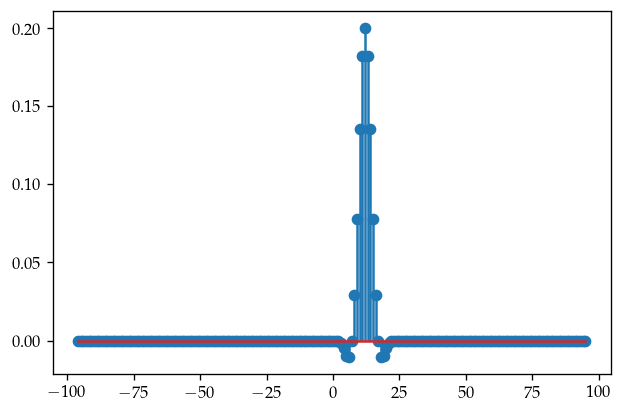

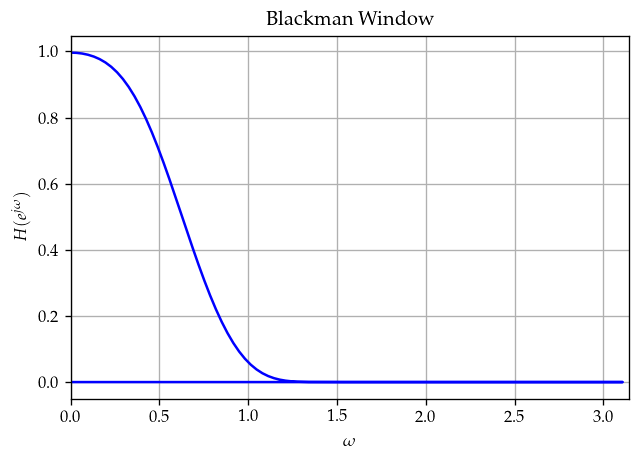

In [69]:
# Blackman
w_blackman = 0.42 - 0.5*np.cos(2*np.pi*n/M) + 0.08*np.cos(4*np.pi*n/M)
for i in range(len(w_blackman)):
    if n[i]>=M or n[i]<0:
        w_blackman[i] = 0
h_blackman = h_d * w_blackman
plt.figure(dpi=120)
plt.stem(n, h_blackman)

H_blackman = fft(h_blackman)
freq = fftfreq(n.shape[-1])
plt.figure(dpi=120)
plt.plot(freq*2*np.pi, abs(H_blackman), 'b')
plt.title('Blackman Window')
plt.xlabel('$\\omega$')
plt.ylabel('$H(e^{j\\omega})$')
plt.grid(True)
plt.xlim(0, np.pi)

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         طراحی فیلتر با پنجره Triangular:
    </font>
</div>

(0.0, 3.141592653589793)

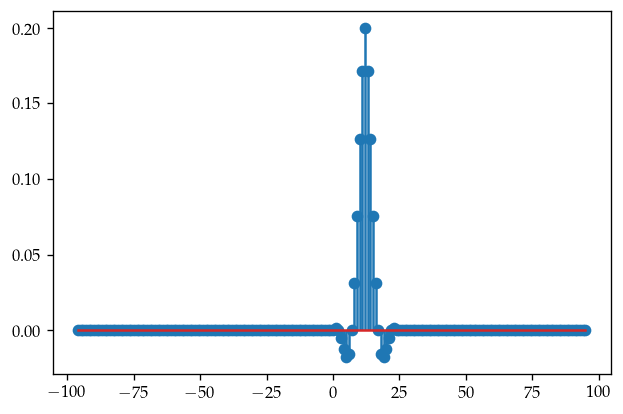

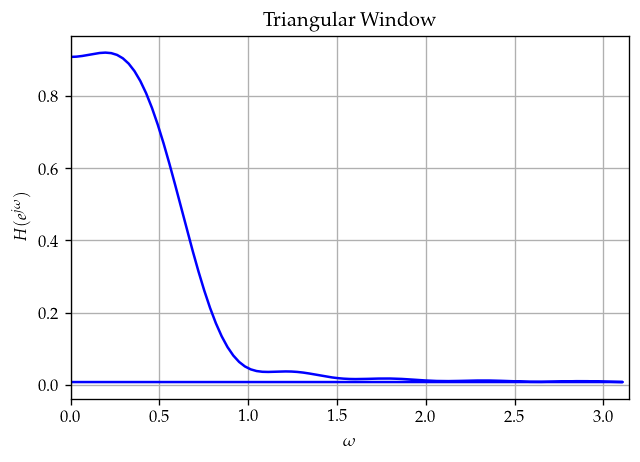

In [70]:
# Triangular
w_triangular = np.zeros(h_d.shape)
for i in range(len(w_triangular)):
    if n[i]>=M or n[i]<0:
        w_triangular[i] = 0
    elif n[i]>=0 and n[i]<=M/2:
        w_triangular[i] = 2*n[i]/M
    else:
        w_triangular[i] = 2 - 2*n[i]/M
h_triangular = h_d * w_triangular
plt.figure(dpi=120)
plt.stem(n, h_triangular)

H_triangular = fft(h_triangular)
freq = fftfreq(n.shape[-1])
plt.figure(dpi=120)
plt.plot(freq*2*np.pi, abs(H_triangular), 'b')
plt.title('Triangular Window')
plt.xlabel('$\\omega$')
plt.ylabel('$H(e^{j\\omega})$')
plt.grid(True)
plt.xlim(0, np.pi)

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         طراحی فیلتر با پنجره Rectangular:
    </font>
</div>

(0.0, 3.141592653589793)

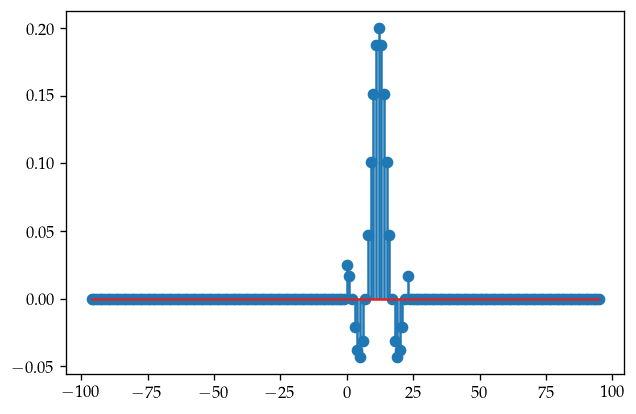

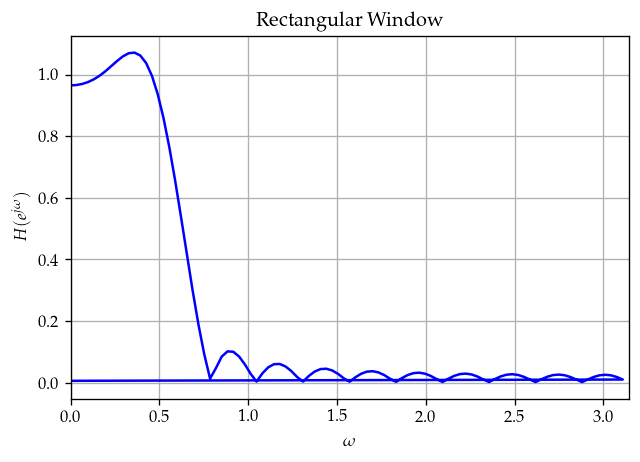

In [71]:
# Rectangular
w_rectangular = np.zeros(h_d.shape)
for i in range(len(w_rectangular)):
    if n[i]>=M or n[i]<0:
        w_rectangular[i] = 0
    else:
        w_rectangular[i] = 1
h_rectangular = h_d * w_rectangular
plt.figure(dpi=120)
plt.stem(n, h_rectangular)

H_rectangular = fft(h_rectangular)
freq = fftfreq(n.shape[-1])
plt.figure(dpi=120)
plt.plot(freq*2*np.pi, abs(H_rectangular), 'b')
plt.title('Rectangular Window')
plt.xlabel('$\\omega$')
plt.ylabel('$H(e^{j\\omega})$')
plt.grid(True)
plt.xlim(0, np.pi)

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         رسم فیلتر با پنجره kaiser به ازای مقادیر مختلف $\beta$
    </font>
</div>

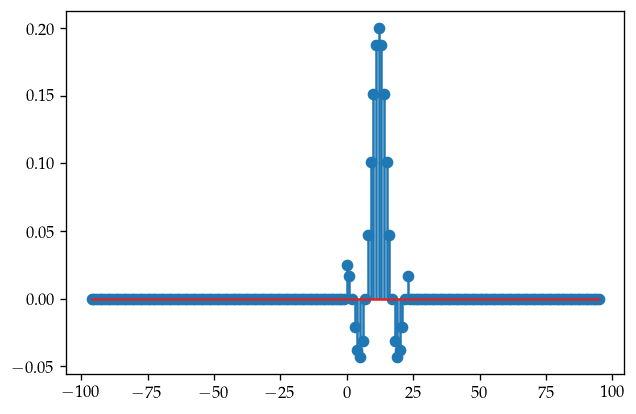

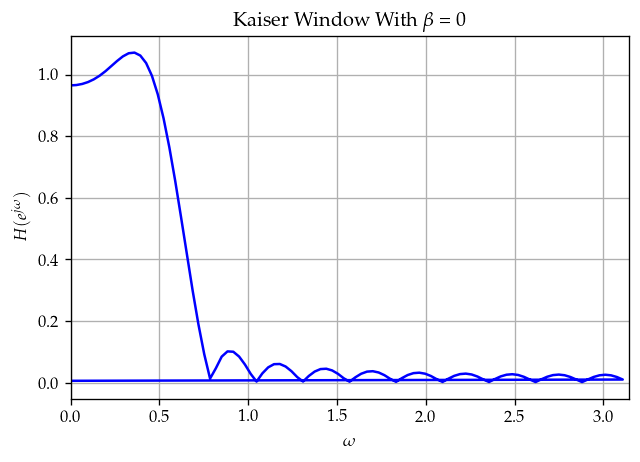

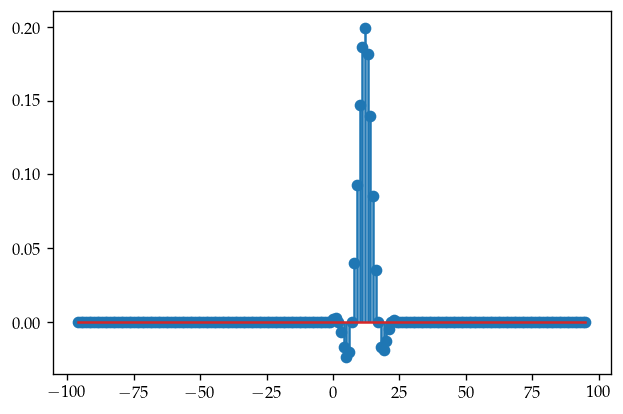

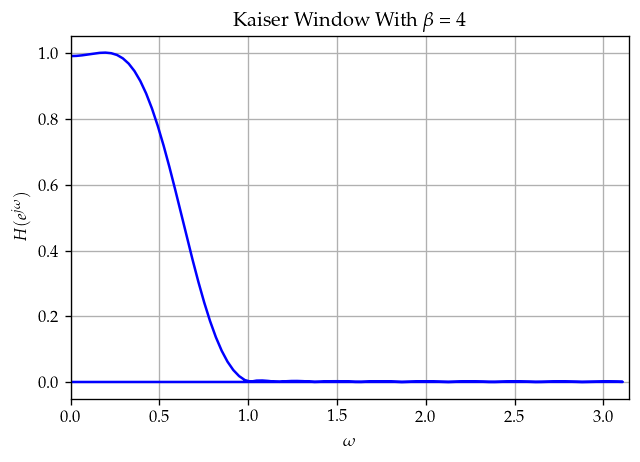

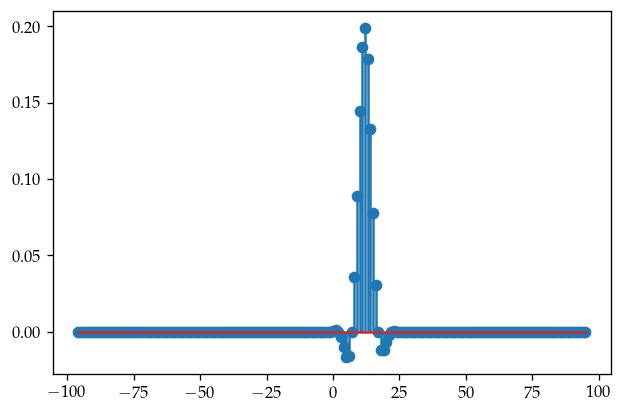

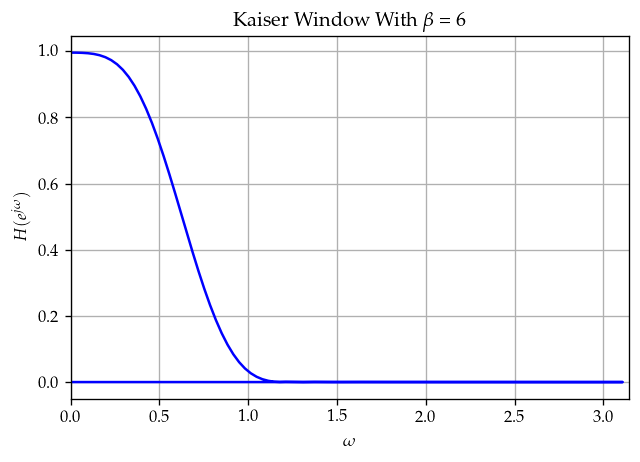

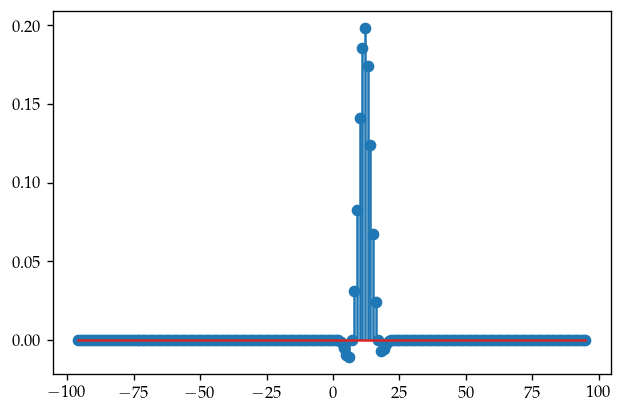

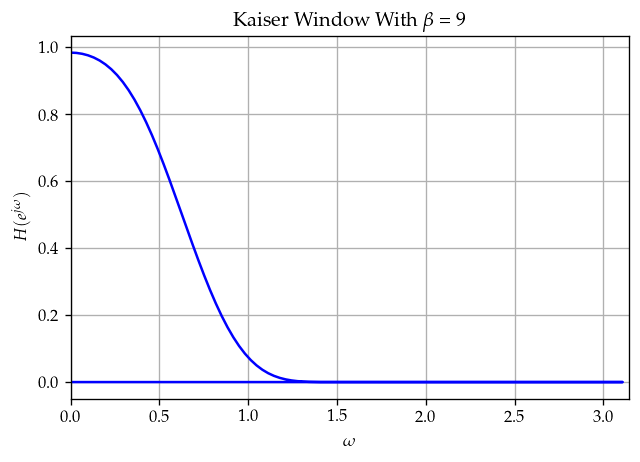

In [74]:
betas = [0, 4, 6, 9]
for beta in betas:
    w = np.kaiser(M, beta)
    h = np.zeros(h_d.shape)
    for i in range(len(n)):
        if n[i]>=M or n[i]<0:
            h[i] = 0
        else:
            h[i] = w[n[i]]*h_d[i]
    plt.figure(dpi=120)
    plt.stem(n, h)

    H = np.fft.fft(h)
    freq = fftfreq(n.shape[-1])
    plt.figure(dpi=120)
    plt.plot(freq*2*np.pi, np.abs(H), 'b')
    plt.title('Kaiser Window With $\\beta$ = {}'.format(beta))
    plt.xlabel('$\\omega$')
    plt.ylabel('$H(e^{j\\omega})$')
    plt.grid(True)
    plt.xlim(0, np.pi)

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="B Yas" color="gray">
سوال 6    
</font>
</h1>

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         متاسفانه در این سوال نتوانستم به نتیجه مطلوبی برسم !
    </font>
</div>

(0.0, 3.141592653589793)

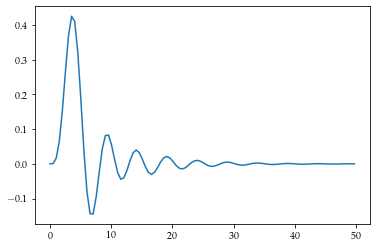

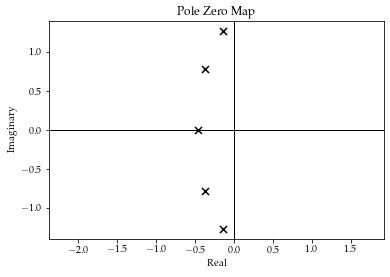

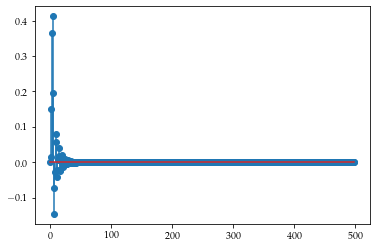

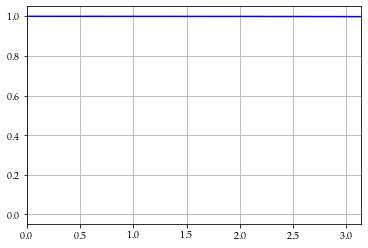

In [62]:
def impulse_invariance(b, a, Td):
    system = TransferFunction(b, a)
    T, hc = impulse(system, T=np.arange(0, 500*Td, 0.1*Td))
    n = np.arange(0, 500)
    h_d = np.zeros(n.shape)
    for i in range(len(n)):
        k = -1
        for j in range(len(T)):
            if T[j]//Td == n[i]:
                k = j
                break
        if k != -1:
            h_d[i] = Td*hc[k]
        else:
            h_d[i] = 0
    H_d = np.fft.fft(h_d)
    freq = fftfreq(n.shape[-1])
    plt.figure()
    plt.stem(n, h_d)
    return H_d, freq*2*np.pi

b, a = cheby1(5, 0.5, 3.2/8*np.pi, analog=True, btype='lowpass')
plt.figure()
T, h = impulse((b, a))
plt.plot(T, h)
plt.figure()
sys = control.pzmap(control.TransferFunction(b, a))
H_d, freq = impulse_invariance(b, a, 1)
plt.figure()
plt.plot(abs(H_d)/max(abs(H_d)), 'b')
plt.grid()
plt.xlim(0, np.pi)

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="B Yas" color="gray">
سوال 7    
</font>
</h1>

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         استفاده از الگوریتم Parks-McClellan:
    </font>
</div>

Text(0, 0.5, 'Gain')

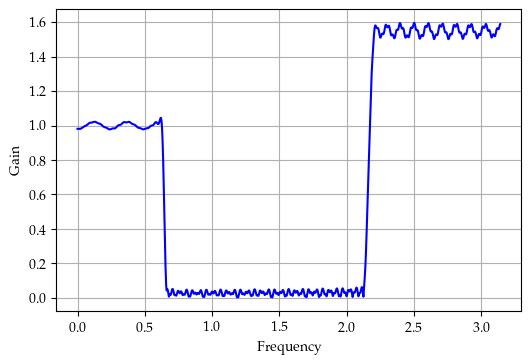

In [13]:
numtaps = 300
fs = 22050.0
f1 = 0.2*fs/2
f2 = 0.21*fs/2
taps = remez(numtaps, [0, f1, f2, 0.5*fs], [1, 0], Hz=fs)
w, h1 = freqz(taps, [1], worN=2000)

fs=22050.0
numtaps = 125
f0 = 0.7*fs/2
taps = remez(numtaps, [0, f0 - 250, f0, 0.5*fs], [0, 1.55], Hz=fs)
w, h2 = freqz(taps, [1], worN=2000)
plt.figure(dpi=100)
plt.plot(w, abs(h1+h2), 'b')
plt.grid(True)
plt.xlabel('Frequency')
plt.ylabel('Gain')

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         استفاده از پنجره kaiser:
    </font>
</div>

(0.0, 3.141592653589793)

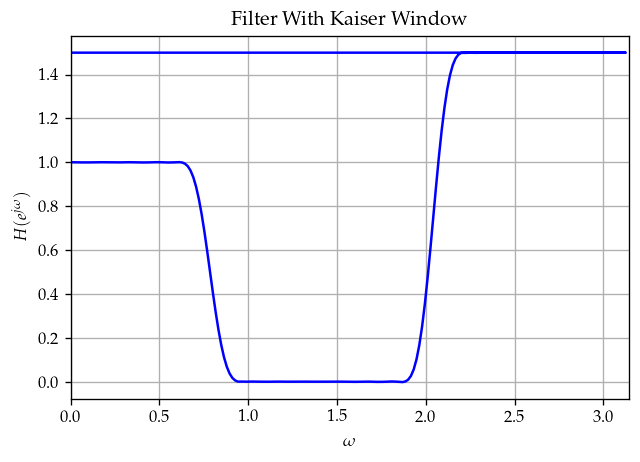

In [12]:
# lowpass filter
M1, beta1 = kaiserord(abs(20*np.log10(0.001)), 0.1)
window1 = np.kaiser(M1, beta1)
omega_c1 = 0.25*np.pi
n = np.arange(-200, 200)
h_d1 = omega_c1/np.pi*np.sinc(omega_c1/np.pi*(n-M1/2))
h = np.zeros(h_d1.shape)
for i in range(len(n)):
    if n[i]>=M1 or n[i]<0:
        h[i] = 0
    else:
        h[i] = window1[n[i]]*h_d1[i]

H1 = fft(h)

# highpass filter
M2, beta2 = kaiserord(abs(20*np.log10(0.001)), 0.1)
window2 = np.kaiser(M2, beta2)
omega_c2 = 0.65*np.pi
h_d2 = omega_c2/np.pi*np.sinc(omega_c2/np.pi*(n-M2/2))
h = np.zeros(h_d2.shape)
for i in range(len(n)):
    if n[i]>=M2 or n[i]<0:
        h[i] = 0
    else:
        h[i] = window2[n[i]]*h_d2[i]

H2 = fft(h)


freq = fftfreq(n.shape[-1])
plt.figure(dpi=120)
plt.plot(freq*2*np.pi, 1.5*(1-abs(H2))+abs(H1), 'b')
plt.title('Filter With Kaiser Window')
plt.xlabel('$\\omega$')
plt.ylabel('$H(e^{j\\omega})$')
plt.grid(True)
plt.xlim(0, np.pi)

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         مقایسه دو روش فوق برای طراحی فیلتر:
    </font>
</div>

<div dir=rtl>
<font face="B Yas" dir=rtl size=3>
        همانطور که مشخص است با روش Parks-McClellan مقدار ripple بیشتر است اما مقدار باند عبور کمتر میشود.
</font>
</div>

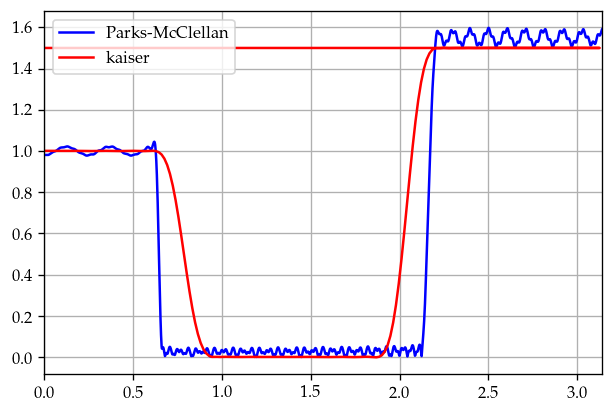

In [16]:
plt.figure(dpi=120)
plt.plot(w, abs(h1+h2), 'b', label='Parks-McClellan')
plt.plot(freq*2*np.pi, 1.5*(1-abs(H2))+abs(H1), 'r', label='kaiser')
plt.xlim(0, np.pi)
plt.grid(True)
plt.legend(loc='best')

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="B Yas" color="gray">
سوال 8    
</font>
</h1>

In [27]:
import scipy.io
file = scipy.io.loadmat('Voice_Sig.mat')
voice = file['Mixed']
fs = file['fs'][0][0]

In [28]:
import sounddevice as sd

sd.play(voice, fs)
status = sd.wait()

In [ ]:
female_file = scipy.io.loadmat('female_voice.mat')
female_voice = female_file['Female']
sd.play(female_voice, fs)
sd.wait()

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         در سلول زیر با استفاده از فیلتر طراحی شده که عکس آن در پایین آمده است سیگنال را فیلتر می کنیم و نام آن را 
        out_voice
        می گذاریم.
    </font>
</div>

In [30]:
with np.load('ab.npz') as data:
    a = data['ba'][1]
    b = data['ba'][0]
out_voice = filtfilt(b, a, voice, axis=0)
sd.play(max(voice)/max(out_voice)*out_voice, fs)
sd.wait()

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         در این فیلتر کردن از فیلتر زیر استفاده شده است:
    </font>
</div>

![title](filter.png)

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         در سلول زیر اطلاعاتی نظیر میانگین خطای مربعات و cross-correlation سیگنال ها محاسبه شده است:
    </font>
</div>

The mean square error is: 0.009550253913470702 

The ratio of mean square error to energy of female voice is: 0.0018423427543272127%



Text(0.5, 1.0, 'Cross Correlation of Signals')

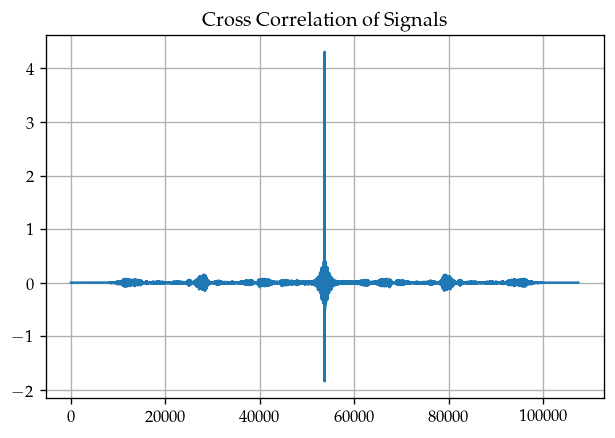

In [50]:
# calculate Mean Square Error of signals
MSE = np.mean((out_voice - female_voice)**2)
# calculate the ratio of MSE to energy of female voice 
MER = MSE / np.sum(female_voice**2) * 100
print('The mean square error is: {} \n'.format(MSE))
print('The ratio of mean square error to energy of female voice is: {}%\n'.format(MER))
# calculate the cross correlation function of two signals
R = correlate(out_voice, female_voice, 'full')
plt.figure(dpi=120)
plt.plot(R)
plt.grid(True)
plt.title('Cross Correlation of Signals')

<div dir='rtl'>
    <font face="B Yas" dir=rtl size=3>
         همانطور که از داده های بالا مشخص است تقریب نسبتا خوبی با استفاده از فیلتر از صدای خانم بدست آمده است.
    </font>
</div>